In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

# Sample Data 만들기

In [16]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

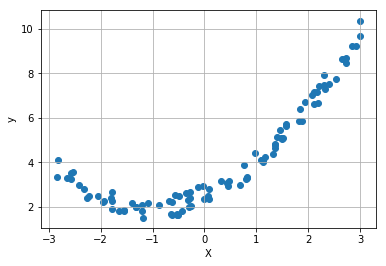

In [17]:
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X, y)
plt.grid(True)
plt.show()

In [18]:
len(X), len(y)

(100, 100)

# Polynomial Regression

### Data Preprocess for Polynomial Features

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [22]:
X[0]

array([2.91270304])

In [23]:
X_poly[0]

array([2.91270304, 8.48383901])

### Load Model

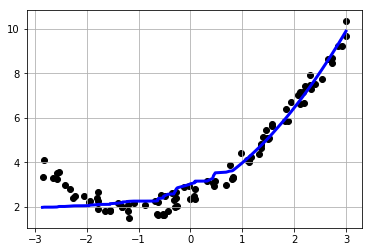

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Test Set을 만들려고 하는데. 위의 데이터셋은 Random하게 섞여있다. 
# Prediction 값들을 순서대로 보려면 X 값들을 순서대로 정렬하고 보고 싶다. 
x_test = np.linspace(-3, 3, 100)  # -3 부터 3까지의 값을 동등하게 100개 생성
lin_preds = lin_reg.predict(X_poly)  # X_poly 값들에 대해 예측

target = np.c_[X, lin_preds]  # feature의 첫번째 값과 예측값 합치기
n_target = np.sort(target, axis=0)  # 순서대로 재정렬

plt.scatter(X, y, color='black')  # 검은 점들 뿌려주기
# 예측값들을 순서대로 정렬
plt.plot(n_target[:, 0], n_target[:,1], color='blue', linewidth=3)  
plt.grid(True)
plt.show()

# Learning Curve

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

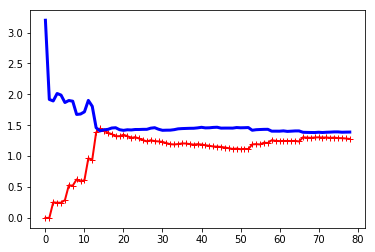

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
train_errors = []
val_errors = []
for m in range(1, len(X_train)):
    lin_reg.fit(X_train[:m], y_train[:m])
    y_train_predict = lin_reg.predict(X_train[:m])
    y_val_predict = lin_reg.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train set')
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='val set')
plt.show()

# Regularization

In [51]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.57800475]])

In [53]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=5, penalty='l2')  # 패널티가 regularization이다. 
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

C:\Users\blue_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.78928508])

In [56]:
# Lasso
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.13879488])

In [57]:
# Elastic Net
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.17733931])